TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE
Analyse risque portefeuille et calcul VaR

📊 PORTEFEUILLE CONSERVATIVE (A)
• Rendement mensuel moyen : 0.94%
• Écart-type mensuel : 0.48%
• Médiane : 1.00%
• Rendement annualisé : 11.85%
• Volatilité annualisée : 1.65%

📊 PORTEFEUILLE AGRESSIF (B)
• Rendement mensuel moyen : 2.89%
• Écart-type mensuel : 4.45%
• Médiane : 4.70%
• Rendement annualisé : 40.79%
• Volatilité annualisée : 15.41%


/tmp/ipython-input-3144683638.py:84: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([rendements_A, rendements_B],


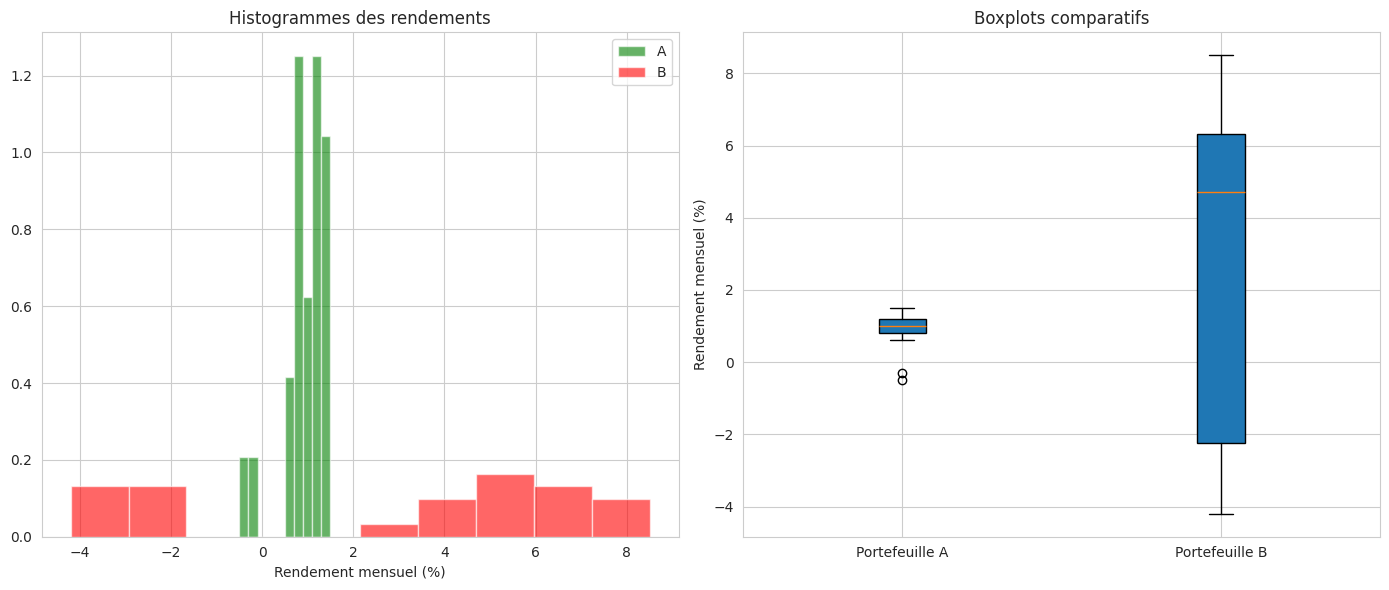


VaR 95 %
Portefeuille A : 9.13% → 45,649 €
Portefeuille B : 15.45% → 77,231 €

Test de normalité (Shapiro-Wilk)
A p-value : 0.0003325496638095976
B p-value : 0.001242967311174172

Ratio de Sharpe
Sharpe A : 5.353
Sharpe B : 2.453

✓ FIN PARTIE 1


In [1]:
# =============================================================================
# TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE
# Analyse risque portefeuille et calcul VaR
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration graphique
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

print("=" * 80)
print("TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE")
print("Analyse risque portefeuille et calcul VaR")
print("=" * 80)

# =============================================================================
# DONNÉES
# =============================================================================

# Rendements mensuels historiques (%)
rendements_A = np.array([
    1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
])

rendements_B = np.array([
    4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
])

capital = 500_000
perte_max_toleree = 50_000
taux_sans_risque = 3.0  # %

# =============================================================================
# QUESTION 1.1 — STATISTIQUES DESCRIPTIVES
# =============================================================================

def calculer_stats_portefeuille(rendements, nom):
    moyenne_mensuelle = np.mean(rendements)
    ecart_type_mensuel = np.std(rendements, ddof=1)
    mediane = np.median(rendements)

    rendement_annuel = ((1 + moyenne_mensuelle / 100) ** 12 - 1) * 100
    volatilite_annuelle = ecart_type_mensuel * np.sqrt(12)

    return {
        "nom": nom,
        "moyenne_mensuelle": moyenne_mensuelle,
        "ecart_type_mensuel": ecart_type_mensuel,
        "mediane": mediane,
        "rendement_annuel": rendement_annuel,
        "volatilite_annuelle": volatilite_annuelle
    }

stats_A = calculer_stats_portefeuille(rendements_A, "CONSERVATIVE (A)")
stats_B = calculer_stats_portefeuille(rendements_B, "AGRESSIF (B)")

for s in [stats_A, stats_B]:
    print(f"\n📊 PORTEFEUILLE {s['nom']}")
    print(f"• Rendement mensuel moyen : {s['moyenne_mensuelle']:.2f}%")
    print(f"• Écart-type mensuel : {s['ecart_type_mensuel']:.2f}%")
    print(f"• Médiane : {s['mediane']:.2f}%")
    print(f"• Rendement annualisé : {s['rendement_annuel']:.2f}%")
    print(f"• Volatilité annualisée : {s['volatilite_annuelle']:.2f}%")

# =============================================================================
# QUESTION 1.2 — VISUALISATION
# =============================================================================

fig, axes = plt.subplots(1, 2)

axes[0].hist(rendements_A, bins=10, alpha=0.6, color="green", label="A", density=True)
axes[0].hist(rendements_B, bins=10, alpha=0.6, color="red", label="B", density=True)
axes[0].set_title("Histogrammes des rendements")
axes[0].set_xlabel("Rendement mensuel (%)")
axes[0].legend()

axes[1].boxplot([rendements_A, rendements_B],
                labels=["Portefeuille A", "Portefeuille B"],
                patch_artist=True)
axes[1].set_title("Boxplots comparatifs")
axes[1].set_ylabel("Rendement mensuel (%)")

plt.tight_layout()
plt.show()

# =============================================================================
# QUESTION 1.3 — VALUE AT RISK (VaR 95%)
# =============================================================================

def calculer_var(stats_dict, capital, alpha=0.05):
    z = stats.norm.ppf(alpha)  # ≈ -1.645

    var_mensuelle_pct = stats_dict["moyenne_mensuelle"] + z * stats_dict["ecart_type_mensuel"]
    var_annuelle_pct = stats_dict["rendement_annuel"] + z * stats_dict["volatilite_annuelle"]

    return {
        "var_mensuelle_pct": var_mensuelle_pct,
        "var_annuelle_pct": var_annuelle_pct,
        "var_annuelle_euros": capital * var_annuelle_pct / 100
    }

var_A = calculer_var(stats_A, capital)
var_B = calculer_var(stats_B, capital)

print("\nVaR 95 %")
print(f"Portefeuille A : {var_A['var_annuelle_pct']:.2f}% → {var_A['var_annuelle_euros']:,.0f} €")
print(f"Portefeuille B : {var_B['var_annuelle_pct']:.2f}% → {var_B['var_annuelle_euros']:,.0f} €")

# Test normalité (Shapiro-Wilk)
print("\nTest de normalité (Shapiro-Wilk)")
print("A p-value :", stats.shapiro(rendements_A)[1])
print("B p-value :", stats.shapiro(rendements_B)[1])

# =============================================================================
# QUESTION 1.4 — RATIO SHARPE
# =============================================================================

sharpe_A = (stats_A["rendement_annuel"] - taux_sans_risque) / stats_A["volatilite_annuelle"]
sharpe_B = (stats_B["rendement_annuel"] - taux_sans_risque) / stats_B["volatilite_annuelle"]

print("\nRatio de Sharpe")
print(f"Sharpe A : {sharpe_A:.3f}")
print(f"Sharpe B : {sharpe_B:.3f}")

print("\n✓ FIN PARTIE 1")


TP PARTIE 2 — THÉORÈME DE BAYES ET SCORING CRÉDIT
Mise à jour probabilités risque avec nouvelles informations

QUESTION 2.1 — CALCUL BAYES MANUEL
Prior P(Défaut) : 5.00%
P(Défaut | Retard) : 29.63%
Facteur multiplicatif : x5.93
Décision métier : Surveillance renforcée

QUESTION 2.2 — MISE À JOUR SÉQUENTIELLE
P(Défaut | Retard ET Découvert) : 64.60%


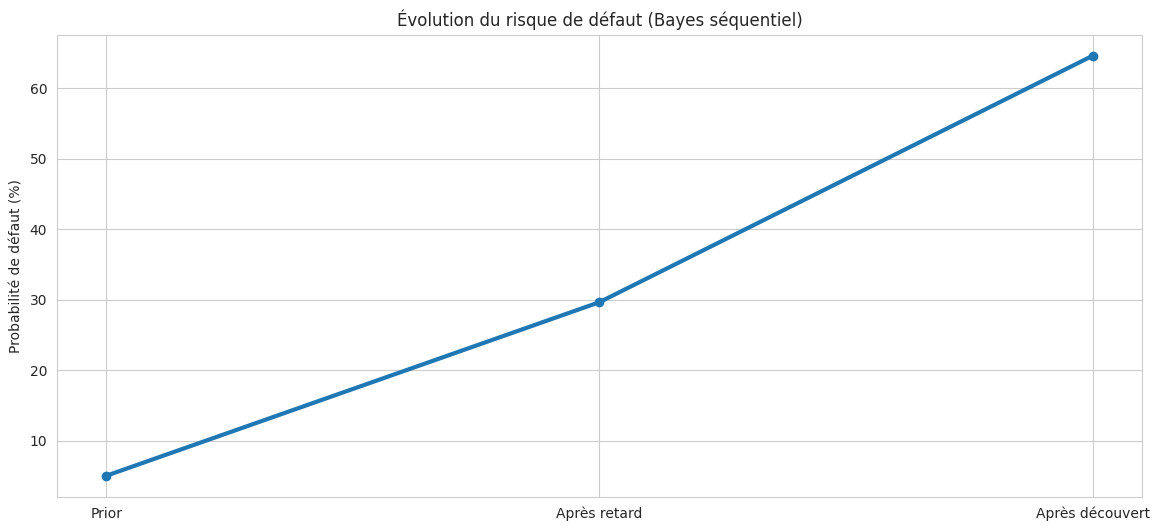


QUESTION 2.3 — FONCTION GÉNÉRIQUE BAYES
Prior segment Risque : 15.00%
Après retard : 58.54%
Après découvert : 85.95%
Après refus crédit : 97.68%

QUESTION 2.4 — MATRICE CONFUSION ET LIEN BAYES
Precision (matrice confusion) : 29.63%
P(Défaut | Retard) Bayes : 29.63%

Interprétation :
La précision correspond exactement à la probabilité bayésienne
P(Défaut | Retard).

✓ FIN PARTIE 2


In [2]:
# =============================================================================
# TP PARTIE 2 — THÉORÈME DE BAYES ET SCORING CRÉDIT
# Mise à jour probabilités de défaut avec nouvelles informations
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

print("=" * 80)
print("TP PARTIE 2 — THÉORÈME DE BAYES ET SCORING CRÉDIT")
print("Mise à jour probabilités risque avec nouvelles informations")
print("=" * 80)

# =============================================================================
# DONNÉES
# =============================================================================

# Taux de défaut de base
taux_defaut_base = 0.05  # 5 %

# Segmentation clients
segments = {
    "Premium":  {"proportion": 0.30, "taux_defaut": 0.015},
    "Standard": {"proportion": 0.50, "taux_defaut": 0.05},
    "Risque":   {"proportion": 0.20, "taux_defaut": 0.15}
}

# Événements observables (Likelihoods)
evenements = {
    "Retard paiement": {
        "P(E|Defaut)": 0.80,
        "P(E|Non-defaut)": 0.10
    },
    "Decouvert >500€": {
        "P(E|Defaut)": 0.65,
        "P(E|Non-defaut)": 0.15
    },
    "Refus credit ailleurs": {
        "P(E|Defaut)": 0.55,
        "P(E|Non-defaut)": 0.08
    }
}

# =============================================================================
# QUESTION 2.1 — CALCUL BAYES MANUEL
# =============================================================================

print("\n" + "=" * 80)
print("QUESTION 2.1 — CALCUL BAYES MANUEL")
print("=" * 80)

prior = segments["Standard"]["taux_defaut"]

p_e_def = evenements["Retard paiement"]["P(E|Defaut)"]
p_e_nondef = evenements["Retard paiement"]["P(E|Non-defaut)"]

# Probabilité totale de l'événement
p_retard = p_e_def * prior + p_e_nondef * (1 - prior)

# Posterior Bayes
posterior_retard = (p_e_def * prior) / p_retard

print(f"Prior P(Défaut) : {prior:.2%}")
print(f"P(Défaut | Retard) : {posterior_retard:.2%}")
print(f"Facteur multiplicatif : x{posterior_retard / prior:.2f}")

# Décision métier
if posterior_retard < 0.15:
    decision = "Surveillance standard"
elif posterior_retard < 0.30:
    decision = "Surveillance renforcée"
else:
    decision = "Restriction crédit"

print("Décision métier :", decision)

# =============================================================================
# QUESTION 2.2 — MISE À JOUR SÉQUENTIELLE
# =============================================================================

print("\n" + "=" * 80)
print("QUESTION 2.2 — MISE À JOUR SÉQUENTIELLE")
print("=" * 80)

# Nouveau prior
prior_2 = posterior_retard

p_e_def_2 = evenements["Decouvert >500€"]["P(E|Defaut)"]
p_e_nondef_2 = evenements["Decouvert >500€"]["P(E|Non-defaut)"]

p_decouvert = p_e_def_2 * prior_2 + p_e_nondef_2 * (1 - prior_2)
posterior_decouvert = (p_e_def_2 * prior_2) / p_decouvert

print(f"P(Défaut | Retard ET Découvert) : {posterior_decouvert:.2%}")

# Graphique évolution
etapes = ["Prior", "Après retard", "Après découvert"]
probas = [prior * 100, posterior_retard * 100, posterior_decouvert * 100]

plt.plot(etapes, probas, marker="o", linewidth=3)
plt.ylabel("Probabilité de défaut (%)")
plt.title("Évolution du risque de défaut (Bayes séquentiel)")
plt.grid(True)
plt.show()

# =============================================================================
# QUESTION 2.3 — FONCTION GÉNÉRIQUE BAYES
# =============================================================================

print("\n" + "=" * 80)
print("QUESTION 2.3 — FONCTION GÉNÉRIQUE BAYES")
print("=" * 80)

def bayes_update(prior, likelihood_pos, likelihood_neg):
    """
    Calcule la probabilité a posteriori via le théorème de Bayes.

    Parameters
    ----------
    prior : float
        Probabilité a priori P(A)
    likelihood_pos : float
        P(Evidence | A)
    likelihood_neg : float
        P(Evidence | non-A)

    Returns
    -------
    posterior : float
        Probabilité a posteriori P(A | Evidence)
    """
    p_evidence = likelihood_pos * prior + likelihood_neg * (1 - prior)
    return (likelihood_pos * prior) / p_evidence

# Test sur segment Risque
prior_risque = segments["Risque"]["taux_defaut"]

post1 = bayes_update(
    prior_risque,
    evenements["Retard paiement"]["P(E|Defaut)"],
    evenements["Retard paiement"]["P(E|Non-defaut)"]
)

post2 = bayes_update(
    post1,
    evenements["Decouvert >500€"]["P(E|Defaut)"],
    evenements["Decouvert >500€"]["P(E|Non-defaut)"]
)

post3 = bayes_update(
    post2,
    evenements["Refus credit ailleurs"]["P(E|Defaut)"],
    evenements["Refus credit ailleurs"]["P(E|Non-defaut)"]
)

print(f"Prior segment Risque : {prior_risque:.2%}")
print(f"Après retard : {post1:.2%}")
print(f"Après découvert : {post2:.2%}")
print(f"Après refus crédit : {post3:.2%}")

# =============================================================================
# QUESTION 2.4 — MATRICE CONFUSION ET LIEN AVEC BAYES
# =============================================================================

print("\n" + "=" * 80)
print("QUESTION 2.4 — MATRICE CONFUSION ET LIEN BAYES")
print("=" * 80)

# Données
TP = 400
FP = 950

precision = TP / (TP + FP)

print(f"Precision (matrice confusion) : {precision:.2%}")
print(f"P(Défaut | Retard) Bayes : {posterior_retard:.2%}")

print("\nInterprétation :")
print("La précision correspond exactement à la probabilité bayésienne")
print("P(Défaut | Retard).")

print("\n✓ FIN PARTIE 2")


TP PARTIE 3 — KNN ET ÉVALUATION DU MODÈLE
Classification crédit et optimisation hyperparamètres
   age       salaire  anciennete_emploi  dette_totale  ratio_dette_revenu  \
0   63  45103.995164           5.410851  12501.672018            0.277174   
1   53  27449.913245           5.281147  16211.862596            0.590598   
2   39  41057.070752           1.445616      0.000000            0.000000   
3   32  38278.857963           5.255189  24702.084283            0.645319   
4   45  48394.819076           1.193406  20000.576705            0.413279   

   nb_credits_actifs  historique_retards  score_credit_bureau  defaut  
0                  3                   1           632.712692       0  
1                  1                   1           622.775748       0  
2                  5                   2           617.430942       0  
3                  1                   1           725.575805       0  
4                  1                   2           711.167106       0  

Taux de 

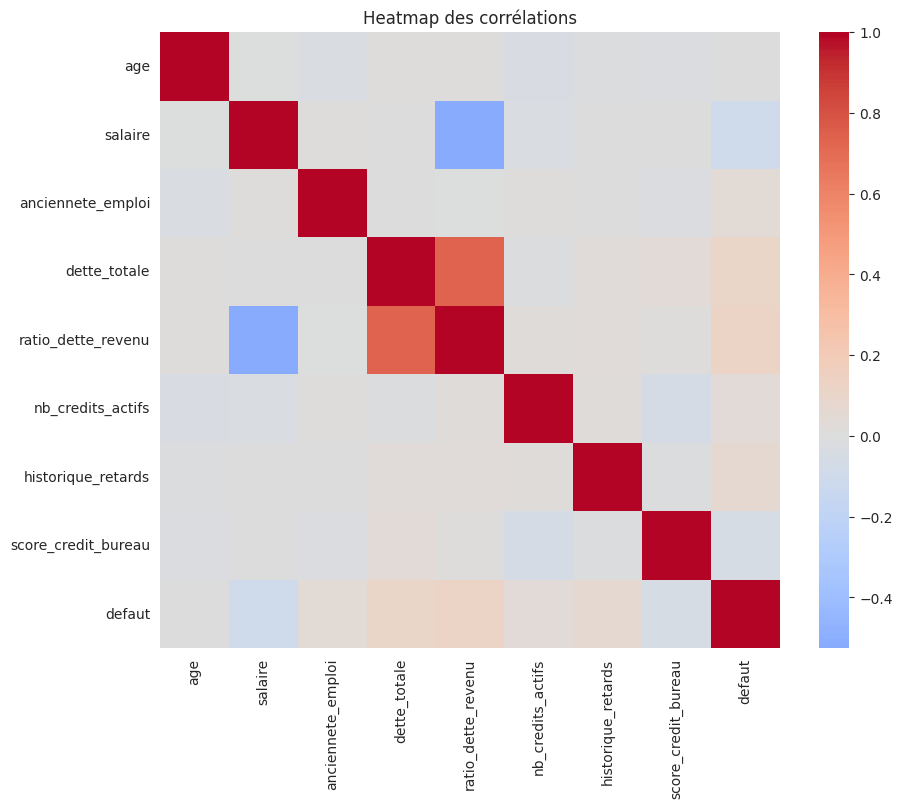

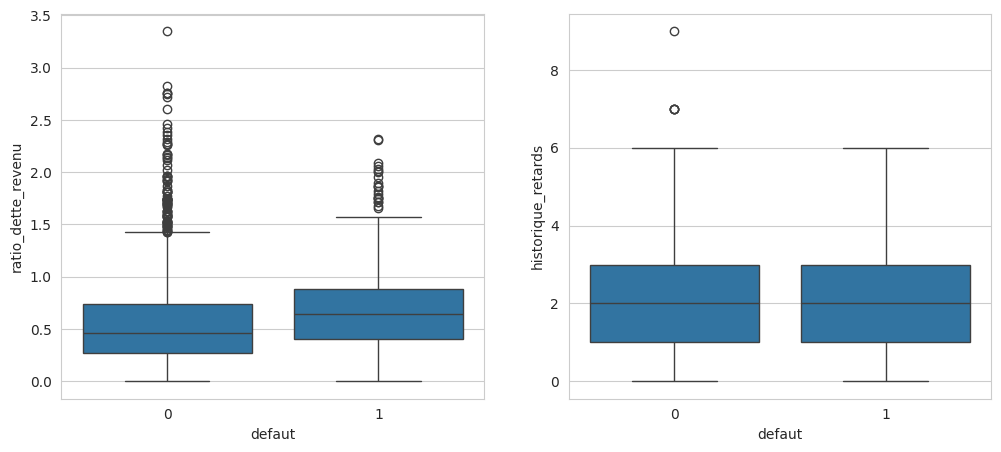

Train size : (1400, 8)
Test size : (600, 8)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

    K  AUC_mean   AUC_std  Recall_mean  Precision_mean
0   1  0.523203  0.023048     0.196485        0.211673
1   3  0.526457  0.025732     0.077058        0.170404
2   5  0.522400  0.031469     0.029787        0.113305
3   7  0.529636  0.028693     0.017021        0.106667
4   9  0.536654  0.018208     0.008511        0.091667
5  11  0.550507  0.025671     0.008603        0.100000
6  15  0.571559  0.021967     0.008603        0.116667
7  20  0.586807  0.020308     0.000000        0.000000
8  25  0.612280  0.019525     0.000000        0.000000
9  30  0.609983  0.022396     0.000000        0.000000

K optimal : 25


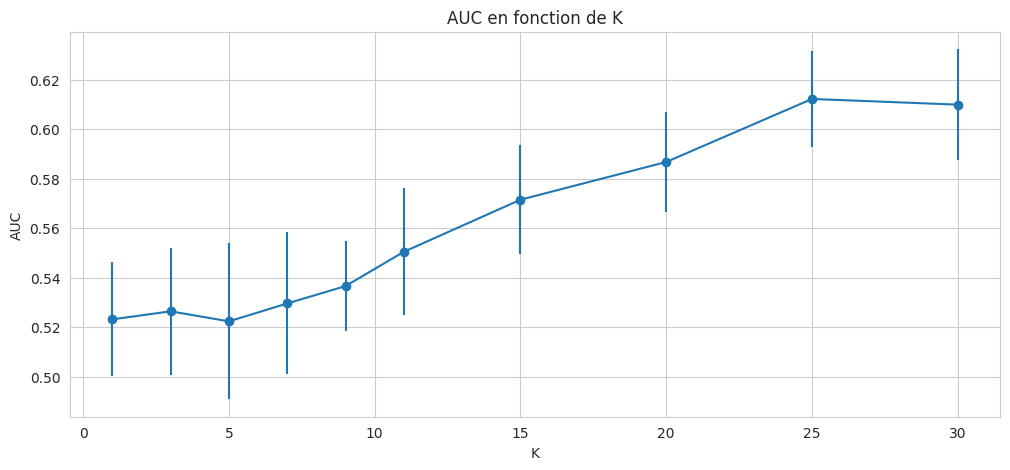


Matrice de confusion :
 [[498   2]
 [100   0]]

Classification report :
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       500
           1       0.00      0.00      0.00       100

    accuracy                           0.83       600
   macro avg       0.42      0.50      0.45       600
weighted avg       0.69      0.83      0.76       600

Accuracy : 0.83
Precision : 0.0
Recall : 0.0
F1-score : 0.0
AUC : 0.58883
Specificity : 0.996


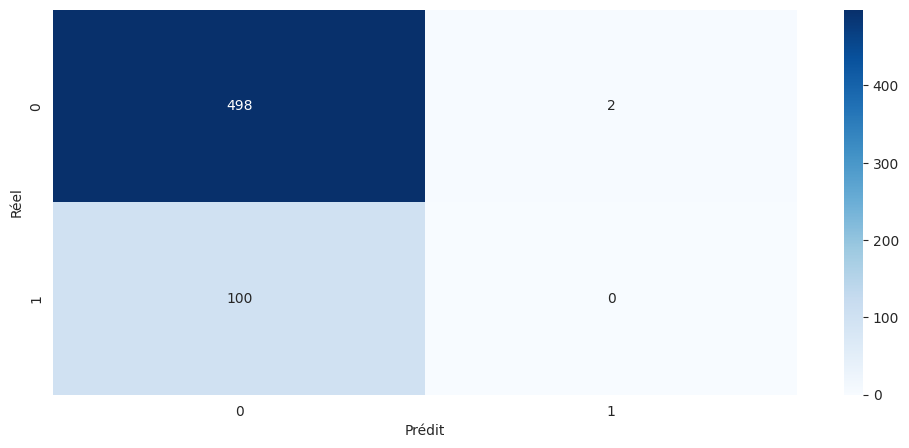

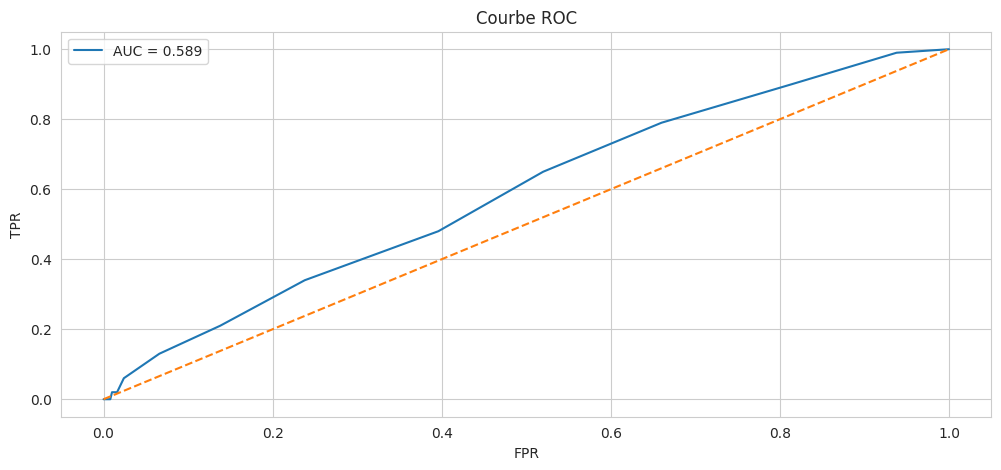

Seuil optimal (Youden) : 0.16

Seuil 0.3
Precision : 0.2826086956521739
Recall : 0.13
F1 : 0.1780821917808219

Seuil 0.5
Precision : 0.0
Recall : 0.0
F1 : 0.0

Seuil 0.7
Precision : 0.0
Recall : 0.0
F1 : 0.0
ROI seuil 0.3 : -1,166,100 €
ROI seuil 0.5 : -1,503,400 €
ROI seuil 0.7 : -1,500,000 €

✓ FIN PARTIE 3


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
# =============================================================================
# TP PARTIE 3 — KNN ET ÉVALUATION DU MODÈLE
# Classification crédit et optimisation hyperparamètres
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, roc_auc_score,
    precision_score, recall_score, f1_score, accuracy_score
)

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

print("=" * 80)
print("TP PARTIE 3 — KNN ET ÉVALUATION DU MODÈLE")
print("Classification crédit et optimisation hyperparamètres")
print("=" * 80)

# =============================================================================
# QUESTION 3.1 — GÉNÉRATION ET EXPLORATION DATASET
# =============================================================================

np.random.seed(42)
n_samples = 2000

age = np.random.randint(25, 66, n_samples)
salaire = np.random.normal(50000, 20000, n_samples).clip(20000, 120000)
anciennete = np.random.exponential(5, n_samples).clip(0, 30)
dette = np.random.normal(25000, 15000, n_samples).clip(0, 80000)
ratio = dette / salaire
nb_credits = np.random.poisson(1.5, n_samples).clip(0, 5)
retards = np.random.poisson(2, n_samples).clip(0, 10)
score = np.random.normal(650, 100, n_samples).clip(300, 850)

defaut_proba = (
    0.05
    + 0.15 * (ratio > 0.5)
    + 0.10 * (retards > 3)
    + 0.08 * (score < 600)
    + 0.05 * (nb_credits > 2)
).clip(0, 0.85)

defaut = (np.random.rand(n_samples) < defaut_proba).astype(int)

df = pd.DataFrame({
    "age": age,
    "salaire": salaire,
    "anciennete_emploi": anciennete,
    "dette_totale": dette,
    "ratio_dette_revenu": ratio,
    "nb_credits_actifs": nb_credits,
    "historique_retards": retards,
    "score_credit_bureau": score,
    "defaut": defaut
})

print(df.head())
print("\nTaux de défaut :", df["defaut"].mean())
print("\nDistribution classes :\n", df["defaut"].value_counts())

# Corrélation
corr = df.corr()["defaut"].sort_values()
print("\nCorrélation avec la variable cible :\n", corr)

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Heatmap des corrélations")
plt.show()

# Boxplots des variables les plus corrélées
fig, axes = plt.subplots(1, 2)
sns.boxplot(x="defaut", y="ratio_dette_revenu", data=df, ax=axes[0])
sns.boxplot(x="defaut", y="historique_retards", data=df, ax=axes[1])
plt.show()

# =============================================================================
# QUESTION 3.2 — PREPROCESSING & SPLIT
# =============================================================================

X = df.drop("defaut", axis=1)
y = df["defaut"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train size :", X_train.shape)
print("Test size :", X_test.shape)

# =============================================================================
# QUESTION 3.3 — OPTIMISATION DU K
# =============================================================================

ks = [1, 3, 5, 7, 9, 11, 15, 20, 25, 30]
results = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    auc = cross_val_score(knn, X_train, y_train, cv=cv, scoring="roc_auc")
    recall = cross_val_score(knn, X_train, y_train, cv=cv, scoring="recall")
    precision = cross_val_score(knn, X_train, y_train, cv=cv, scoring="precision")

    results.append([
        k,
        auc.mean(),
        auc.std(),
        recall.mean(),
        precision.mean()
    ])

results_df = pd.DataFrame(
    results,
    columns=["K", "AUC_mean", "AUC_std", "Recall_mean", "Precision_mean"]
)

print(results_df)

best_k = results_df.loc[results_df["AUC_mean"].idxmax(), "K"]
print("\nK optimal :", best_k)

plt.errorbar(
    results_df["K"],
    results_df["AUC_mean"],
    yerr=results_df["AUC_std"],
    fmt="-o"
)
plt.xlabel("K")
plt.ylabel("AUC")
plt.title("AUC en fonction de K")
plt.grid(True)
plt.show()

# =============================================================================
# QUESTION 3.4 — MODÈLE FINAL & ÉVALUATION
# =============================================================================

knn_final = KNeighborsClassifier(n_neighbors=int(best_k))
knn_final.fit(X_train, y_train)

y_pred = knn_final.predict(X_test)
y_proba = knn_final.predict_proba(X_test)[:,1]

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

print("\nMatrice de confusion :\n", cm)
print("\nClassification report :\n", classification_report(y_test, y_pred))

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("AUC :", roc_auc_score(y_test, y_proba))
print("Specificity :", TN / (TN + FP))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# =============================================================================
# QUESTION 3.5 — COURBE ROC & ANALYSE DES SEUILS
# =============================================================================

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], "--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Courbe ROC")
plt.legend()
plt.show()

# Indice de Youden
youden = tpr - fpr
best_threshold = thresholds[np.argmax(youden)]
print("Seuil optimal (Youden) :", best_threshold)

# Test seuils métier
for seuil in [0.3, 0.5, 0.7]:
    y_seuil = (y_proba >= seuil).astype(int)
    print(f"\nSeuil {seuil}")
    print("Precision :", precision_score(y_test, y_seuil))
    print("Recall :", recall_score(y_test, y_seuil))
    print("F1 :", f1_score(y_test, y_seuil))

# =============================================================================
# QUESTION 3.6 — ROI & RECOMMANDATION BUSINESS
# =============================================================================

GAIN_TP = 15000
COUT_FP = 500 + 1200
PERTE_FN = 15000

def calcul_roi(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp * GAIN_TP - fp * COUT_FP - fn * PERTE_FN

for seuil in [0.3, 0.5, 0.7]:
    y_seuil = (y_proba >= seuil).astype(int)
    roi = calcul_roi(y_test, y_seuil)
    print(f"ROI seuil {seuil} : {roi:,.0f} €")

print("\n✓ FIN PARTIE 3")
